In [48]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


In [49]:
#used to set the range for random.uniform()
print(np.max(gen2_dom_x_positions))
print(np.min(gen2_dom_x_positions))
print(np.max(gen2_dom_y_positions))
print(np.min(gen2_dom_y_positions))

525.42
-570.9
463.72
-521.08


In [58]:
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-600., 550.)
        rand_x_positions.insert(index, dom_num)
        index = index + 1

splitedSize = 67
rand_dom_x_positions = [rand_x_positions[x:x+splitedSize] for x in range(0, len(rand_x_positions), splitedSize)]

print(len(rand_dom_x_positions))
print(len(rand_dom_x_positions[0]))
#print(rand_dom_x_positions)

21
67


In [60]:
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-550., 500.)
        rand_y_positions.insert(index, dom_num)
        index = index + 1

splitedSize = 67
rand_dom_y_positions = [rand_y_positions[y:y+splitedSize] for y in range(0, len(rand_y_positions), splitedSize)]
print(len(rand_dom_y_positions))
print(len(rand_dom_y_positions[0]))
#print(rand_dom_y_positions)

21
67


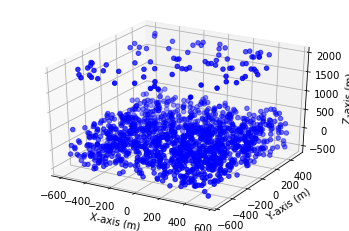

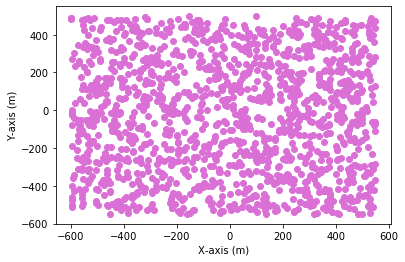

In [61]:
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.scatter3D(rand_dom_x_positions, rand_dom_y_positions, gen2_dom_z_positions, c='blue', depthshade=True)
plt.show()

ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.scatter(rand_dom_x_positions, rand_dom_y_positions, c='orchid')
plt.show()